Train-Test Split Accuracy: 1.0
K-Fold CV Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean K-Fold CV Accuracy: 0.9666666666666668
Stratified K-Fold CV Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Stratified K-Fold CV Accuracy: 0.9666666666666668

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



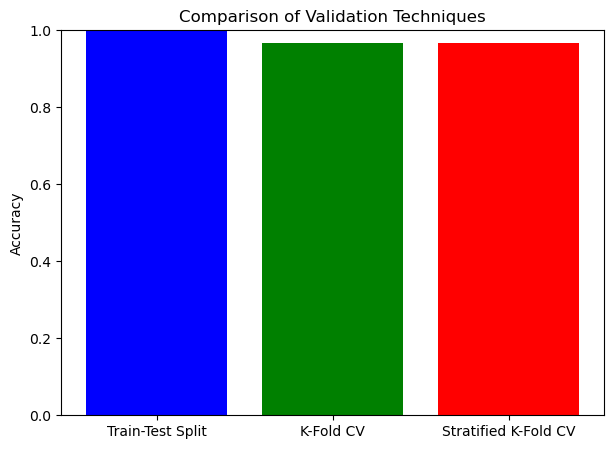

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_train_test = accuracy_score(y_test, y_pred)
kfold_scores = cross_val_score(model, X, y, cv=5)
skf = StratifiedKFold(n_splits=5)
strat_scores = cross_val_score(model, X, y, cv=skf)
print("Train-Test Split Accuracy:", acc_train_test)
print("K-Fold CV Scores:", kfold_scores)
print("Mean K-Fold CV Accuracy:", kfold_scores.mean())
print("Stratified K-Fold CV Scores:", strat_scores)
print("Mean Stratified K-Fold CV Accuracy:", strat_scores.mean())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
methods = ['Train-Test Split', 'K-Fold CV', 'Stratified K-Fold CV']
accuracies = [acc_train_test, kfold_scores.mean(), strat_scores.mean()]
plt.figure(figsize=(7,5))
plt.bar(methods, accuracies, color=['blue','green','red'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Comparison of Validation Techniques')
plt.show()